**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

**Importing Dataset**

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\housing_data.csv")
df

,size_sqft,num_bedrooms,num_bathrooms,price
0,2382,3,2,483736
1,1700,1,1,396453
2,1989,1,1,409845
3,2620,3,3,551995
4,2433,1,1,518259
...,...,...,...,...
95,1853,1,1,366562
96,1505,1,1,337448
97,2392,2,2,536927
98,1563,2,1,374264


**Splitting the data**

In [6]:
X = df.drop('price' , axis=1)
y = df['price']

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.2 , random_state=23)

**Model Building**

In [10]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [18]:
model = sm.OLS(y_train ,X_train ).fit()

In [19]:
y_pred = model.predict(X_test)
y_pred

26    315229.232328
80    200152.949415
82    355173.066067
68    224689.875855
77    255884.107917
37    425360.088207
3     586455.997064
55    351749.308889
20     68148.089346
17    291453.140817
72    450462.197232
24    531097.654363
71    323217.999076
87    293925.854335
89    442473.430484
29    455014.161528
9     354393.742253
67    354982.857335
42    148606.383020
94    344901.794534
dtype: float64

**Model Evaluation**

In [25]:
print("R-2 Score :- " , r2_score(y_test , y_pred))

R-2 Score :-  0.9643708019226305


In [24]:
print("Root Mean Squared Error :- " , np.sqrt(mean_squared_error(y_test , y_pred)))

Root Mean Squared Error :-  24881.981649284662


**Assumptions of Linear Regression**
* **1. Linearity :- There should be Linear Relationship between Inputs and Target Variable**

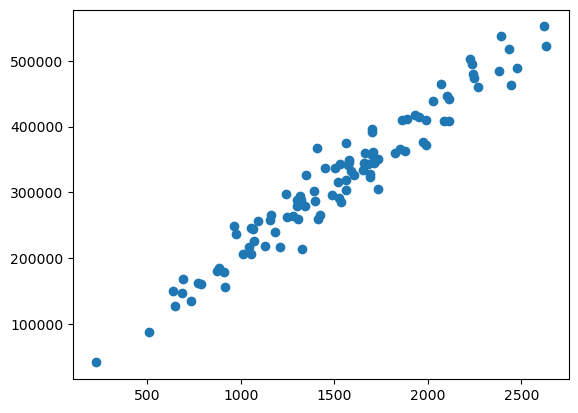

In [26]:
plt.scatter(X['size_sqft'] , y)

**>>>There is a strong linear relationship**

* **2. Independant Input features / Multicolinearity :- There shound not Multicolinearity between input features**

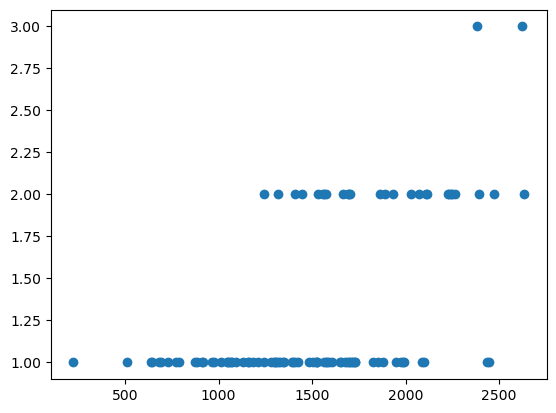

In [27]:
plt.scatter(X['size_sqft'] , X['num_bedrooms'])

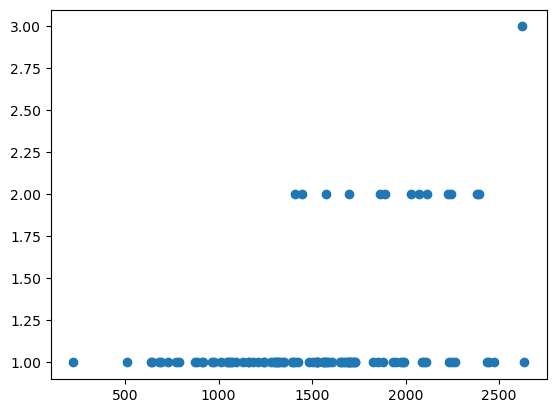

In [28]:
plt.scatter(X['size_sqft'] , X['num_bathrooms'])

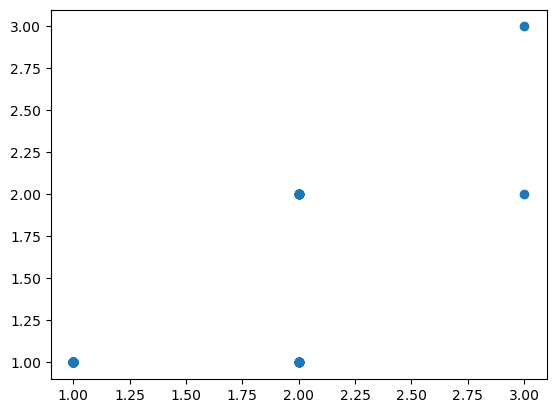

In [29]:
plt.scatter(X['num_bedrooms'] , X['num_bathrooms'])

**>>>There is not relationship between inputs feature**

* **3. Normality :- Residuals should follow Normal Distribution with respect to mean=0**

<Axes: ylabel='Density'>

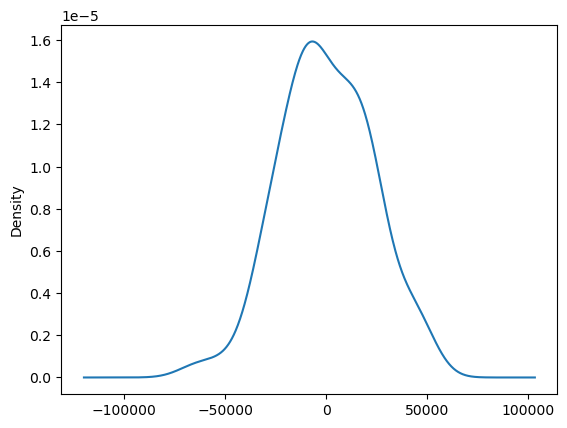

In [33]:
resid = model.resid
resid.plot(kind='kde')

**>>>Residuals following Normal Distribution**

* **4. Homoscedasticity / Equal variance**

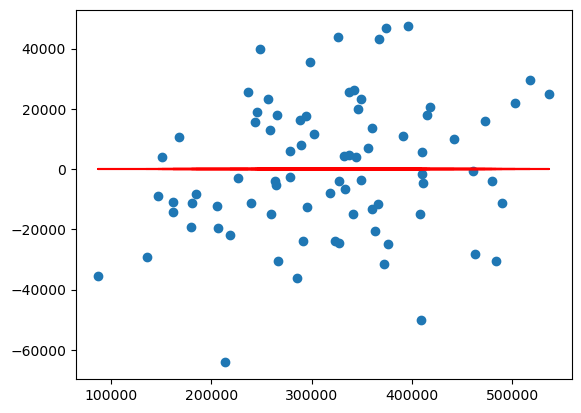

In [34]:
plt.scatter(y_train , resid)
plt.plot(y_train,[0]*y_train , color='red')

* **5. No Auto Correlation**

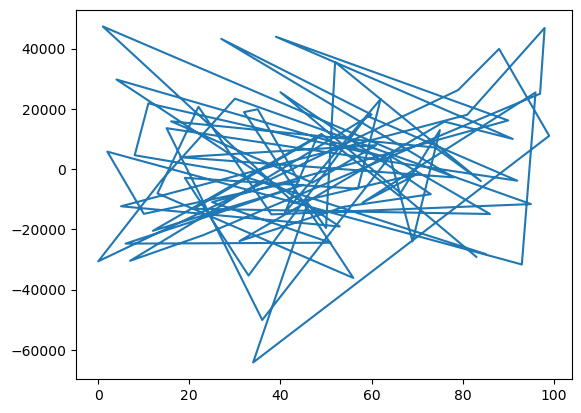

In [36]:
plt.plot(resid.index , resid)